In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies= movies.merge(credits,on='title')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Feature selection

In [5]:
#generes, id,keywords, title, overview, cast. crew
movies=movies[['genres', 'id', 'keywords', 'title', 'overview', 'cast', 'crew']]
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# remove duplicates

In [7]:
movies.isnull().sum()
movies.dropna(inplace=True)
movies.isnull().sum()

genres      0
id          0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

# formatting columns

In [9]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
# [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
# ['Action', "Adventure", 'Fantasy', 'Science Fiction']
import ast

def convert(obj):
  # Check if the object is already a list
  if isinstance(obj, list):
    return obj  # If it is a list, return it as is

  l=[]
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l

In [11]:
movies['genres']= movies['genres'].apply(convert)
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies['keywords']= movies['keywords'].apply(convert)

In [13]:
movies.iloc[0].keywords

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [14]:
movies.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [15]:
# extracting 1st 3 actors name
# def actor(obj):
#   # Check if the object is already a list
#   if isinstance(obj, list):
#     return obj  # If it is a list, return it as is

#   l=[]
#   for i in ast.literal_eval(obj):
#     if(i['name']!=3):
#       l.append(i['name'])
#       break
#   return l


import ast

def actor(obj):
    l = []
    try:
        data = ast.literal_eval(obj)
        for i in data:
            # Check if 'name' key exists and is not empty
            if 'name' in i and i['name']:
                l.append(i['name'])
            if len(l) == 3:
                break  # Stop when we've collected 3 valid names
    except Exception as e:
        print("Error:", e)
    return l


In [16]:
movies['cast']=movies['cast'].apply(actor)

In [17]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# counting unique value

In [19]:
def fetch_director(obj):
  # Check if the object is already a list
  if isinstance(obj, list):
    return obj  # If it is a list, return it as is

  l=[]
  for i in ast.literal_eval(obj):
    if(i['job']=="Director"):
      l.append(i['name'])
      break
  return l
    
movies['crew']=movies['crew'].apply(fetch_director)

In [20]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [21]:
movies['overview'][0] # op is string ==> convert it into a list

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [22]:
# converting into list
movies['overview'].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [23]:
movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


# transformation on removing spaces from names

In [25]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(' ','') for i in x]) # space deleted i.e,  ScienceFiction
movies['cast']=movies['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(' ','') for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(' ','') for i in x])

movies.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,A cryptic message from Bond’s past sends him o...,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"John Carter is a war-weary, former military ca...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


# data set is ready 
## adding a new col i.e, tag

In [27]:
# movies['tag']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']
movies['tag'] = movies['overview'].astype(str) + movies['genres'].apply(lambda x: ' '.join(x)) + movies['keywords'].apply(lambda x: ' '.join(x))\
            + movies['cast'].apply(lambda x: ' '.join(x)) + movies['crew'].apply(lambda x: ' '.join(x))
movies.head()

,genres,id,keywords,title,overview,cast,crew,tag
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"In the 22nd century, a paraplegic Marine is di..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"Captain Barbossa, long believed to be dead, ha..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,A cryptic message from Bond’s past sends him o...,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],A cryptic message from Bond’s past sends him o...
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],Following the death of District Attorney Harve...
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"John Carter is a war-weary, former military ca...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"John Carter is a war-weary, former military ca..."


In [28]:
new_df= movies[['id','title','genres' ,'tag']]
new_df.head()

,id,title,genres,tag
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","John Carter is a war-weary, former military ca..."


# counting genres vaules

In [30]:
new_df['genres'].values

array([list(['Action', 'Adventure', 'Fantasy', 'ScienceFiction']),
       list(['Adventure', 'Fantasy', 'Action']),
       list(['Action', 'Adventure', 'Crime']), ...,
       list(['Comedy', 'Drama', 'Romance', 'TVMovie']), list([]),
       list(['Documentary'])], dtype=object)

In [32]:
# Flatten all genre lists into one
all_genres = [genre for sublist in new_df['genres'] for genre in sublist]

# Count unique genres
unique_genre_count = len(set(all_genres))

print("Total unique genres:", unique_genre_count)
print("Unique genres:", set(all_genres))


Total unique genres: 20
Unique genres: {'Animation', 'ScienceFiction', 'History', 'Foreign', 'Family', 'Action', 'Documentary', 'Horror', 'Drama', 'Mystery', 'Comedy', 'Crime', 'Western', 'Adventure', 'Romance', 'War', 'TVMovie', 'Music', 'Fantasy', 'Thriller'}


In [33]:
from collections import Counter
genre_counts = Counter([genre for sublist in new_df['genres'] for genre in sublist])
print(genre_counts)


Counter({'Drama': 2299, 'Comedy': 1723, 'Thriller': 1275, 'Action': 1156, 'Romance': 895, 'Adventure': 792, 'Crime': 697, 'ScienceFiction': 538, 'Horror': 520, 'Family': 514, 'Fantasy': 425, 'Mystery': 348, 'Animation': 234, 'History': 197, 'Music': 185, 'War': 144, 'Documentary': 108, 'Western': 82, 'Foreign': 34, 'TVMovie': 8})


# drafting genres values in graph

In [36]:
from collections import Counter

# Flatten and count
genre_counts = Counter([genre for sublist in new_df['genres'] for genre in sublist])

# Show most common genres
print(genre_counts.most_common(10))


[('Drama', 2299), ('Comedy', 1723), ('Thriller', 1275), ('Action', 1156), ('Romance', 895), ('Adventure', 792), ('Crime', 697), ('ScienceFiction', 538), ('Horror', 520), ('Family', 514)]


In [37]:
total = sum(genre_counts.values())
genre_freq_percent = {genre: round((count / total) * 100, 2) for genre, count in genre_counts.items()}

print(genre_freq_percent)


{'Action': 9.5, 'Adventure': 6.51, 'Fantasy': 3.49, 'ScienceFiction': 4.42, 'Crime': 5.73, 'Drama': 18.88, 'Thriller': 10.47, 'Animation': 1.92, 'Family': 4.22, 'Western': 0.67, 'Comedy': 14.15, 'Romance': 7.35, 'Horror': 4.27, 'Mystery': 2.86, 'History': 1.62, 'War': 1.18, 'Music': 1.52, 'Documentary': 0.89, 'Foreign': 0.28, 'TVMovie': 0.07}


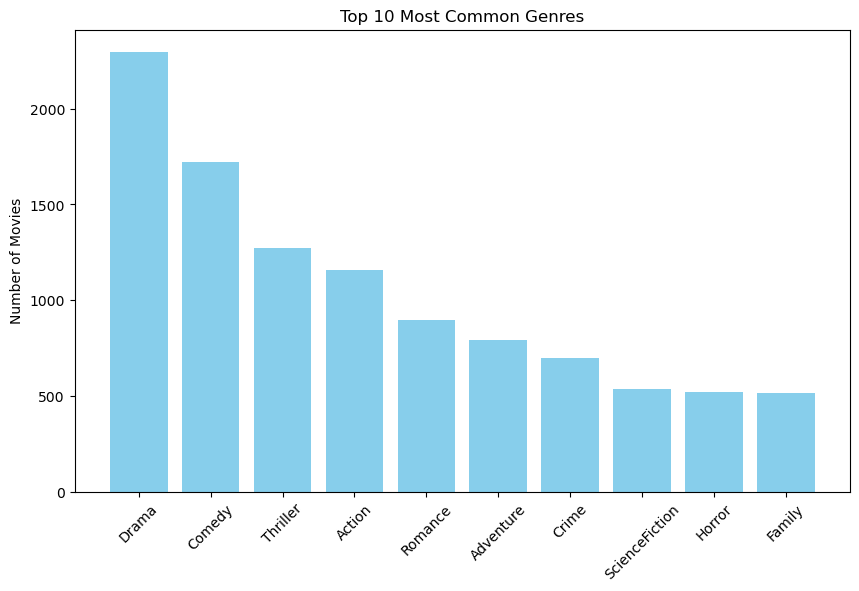

In [38]:
import matplotlib.pyplot as plt

top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10,6))
plt.bar(genres, counts, color='skyblue')
plt.title("Top 10 Most Common Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


# formatting tag column

In [40]:
new_df['tag'][0] # string join with space

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.Action Adventure Fantasy ScienceFictioncultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3dSamWorthington ZoeSaldana SigourneyWeaverJamesCameron'

In [41]:
#lowecase
new_df['tag']=new_df['tag'].astype(str).str.lower() #apply lower function after converting to string if there are other types


C:\Users\DELL\AppData\Local\Temp\ipykernel_12624\2966413321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag']=new_df['tag'].astype(str).str.lower() #apply lower function after converting to string if there are other types


In [42]:
new_df.iloc[0].tag
# lowercase done

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.action adventure fantasy sciencefictioncultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3dsamworthington zoesaldana sigourneyweaverjamescameron'

In [43]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# Model buliding

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
X=new_df['tag']
# y=new_df['genres'] ----> list of genres (like ['Action', 'Adventure']) — and classification models expect a single label per sample, not a list.
y = new_df['genres'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words='english')
X = cv.fit_transform(new_df['tag']).toarray()


In [59]:
X_test, X_train, y_test, y_train= train_test_split(X, y, random_state=40, test_size=0.2)

# Decision tree


--- Fold 1 ---
Train Accuracy: 1.00
Test Accuracy: 0.65


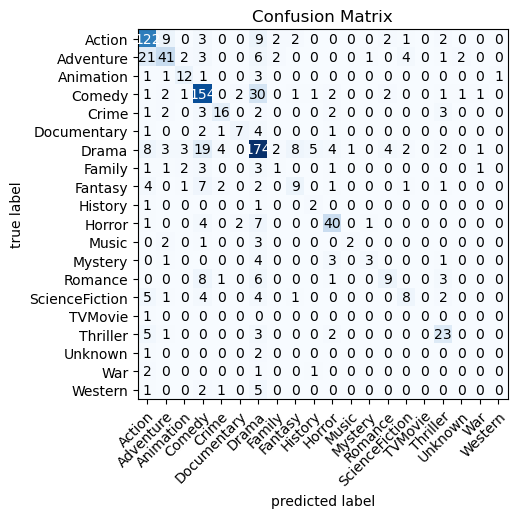

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.69      0.80      0.74       152
     Adventure       0.64      0.49      0.56        83
     Animation       0.57      0.63      0.60        19
        Comedy       0.72      0.77      0.75       199
         Crime       0.64      0.55      0.59        29
   Documentary       0.64      0.44      0.52        16
         Drama       0.65      0.72      0.68       240
        Family       0.14      0.08      0.10        13
       Fantasy       0.43      0.32      0.37        28
       History       0.22      0.50      0.31         4
        Horror       0.70      0.73      0.71        55
         Music       0.67      0.25      0.36         8
       Mystery       0.60      0.25      0.35        12
       Romance       0.53      0.32      0.40        28
ScienceFiction       0.50      0.32      0.39        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

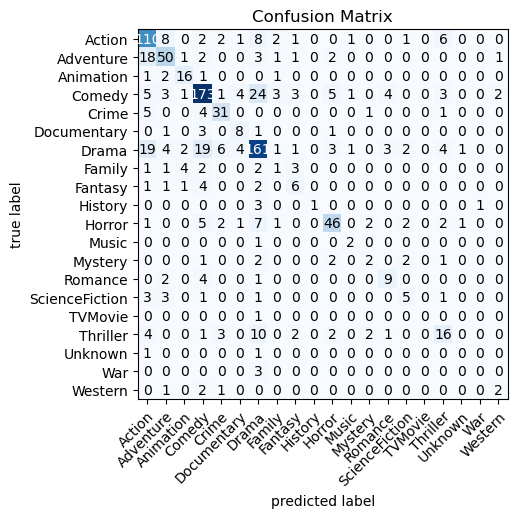

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.65      0.77      0.71       142
     Adventure       0.66      0.63      0.65        79
     Animation       0.64      0.76      0.70        21
        Comedy       0.77      0.75      0.76       232
         Crime       0.67      0.74      0.70        42
   Documentary       0.44      0.57      0.50        14
         Drama       0.70      0.70      0.70       231
        Family       0.10      0.07      0.08        14
       Fantasy       0.35      0.40      0.38        15
       History       1.00      0.20      0.33         5
        Horror       0.75      0.66      0.70        70
         Music       0.40      0.67      0.50         3
       Mystery       0.29      0.20      0.24        10
       Romance       0.53      0.56      0.55        16
ScienceFiction       0.42      0.36      0.38        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

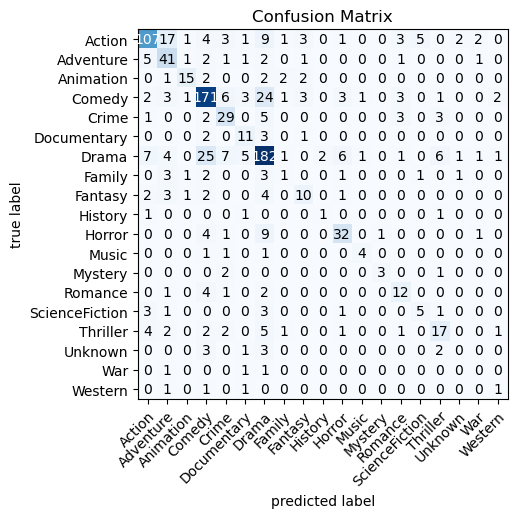

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.81      0.67      0.74       159
     Adventure       0.53      0.73      0.61        56
     Animation       0.75      0.62      0.68        24
        Comedy       0.75      0.76      0.76       224
         Crime       0.55      0.67      0.60        43
   Documentary       0.44      0.65      0.52        17
         Drama       0.71      0.73      0.72       251
        Family       0.14      0.08      0.10        13
       Fantasy       0.50      0.43      0.47        23
       History       0.33      0.25      0.29         4
        Horror       0.70      0.67      0.68        48
         Music       0.67      0.57      0.62         7
       Mystery       0.75      0.50      0.60         6
       Romance       0.50      0.60      0.55        20
ScienceFiction       0.45      0.36      0.40        14
       TVMovie       0.00      0.00      0.00         0
      Thriller       0.

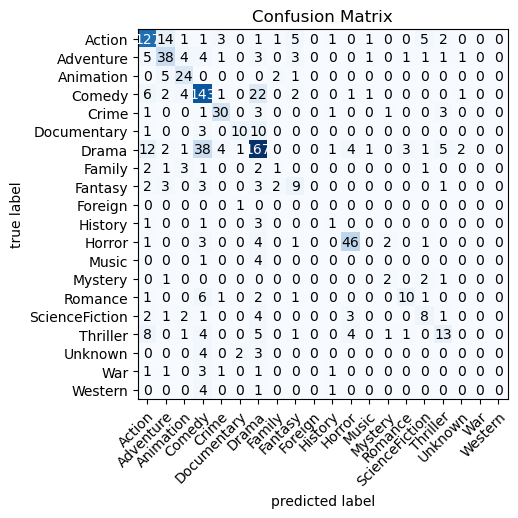

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.75      0.78      0.77       162
     Adventure       0.56      0.60      0.58        63
     Animation       0.60      0.75      0.67        32
        Comedy       0.65      0.78      0.71       183
         Crime       0.73      0.75      0.74        40
   Documentary       0.71      0.42      0.53        24
         Drama       0.70      0.69      0.70       242
        Family       0.17      0.09      0.12        11
       Fantasy       0.39      0.39      0.39        23
       Foreign       0.00      0.00      0.00         1
       History       0.17      0.17      0.17         6
        Horror       0.79      0.79      0.79        58
         Music       0.00      0.00      0.00         5
       Mystery       0.33      0.33      0.33         6
       Romance       0.67      0.45      0.54        22
ScienceFiction       0.40      0.36      0.38        22
      Thriller       0.

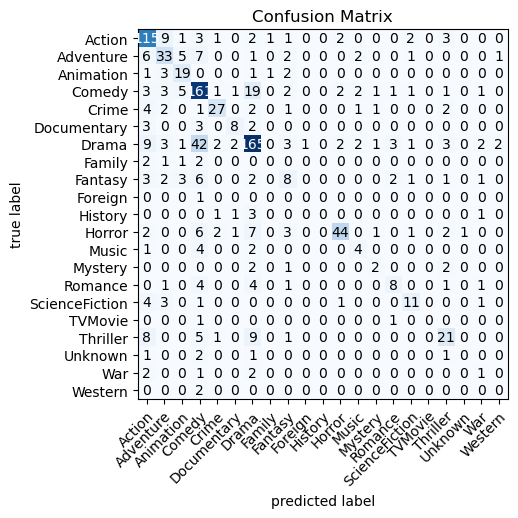

Classification Report:
                 precision    recall  f1-score   support

        Action       0.70      0.82      0.76       140
     Adventure       0.55      0.57      0.56        58
     Animation       0.54      0.70      0.61        27
        Comedy       0.64      0.79      0.71       204
         Crime       0.77      0.66      0.71        41
   Documentary       0.62      0.50      0.55        16
         Drama       0.74      0.68      0.71       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.32      0.28      0.30        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.86      0.63      0.73        70
         Music       0.36      0.36      0.36        11
       Mystery       0.33      0.29      0.31         7
       Romance       0.53      0.40      0.46        20
ScienceFiction       0.61      0.52      0.56        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold} ---")

    # a. Split into train/test for current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # b. Train Decision Tree Model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # c. Predict
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # d. Accuracy
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {acc_train:.2f}")
    print(f"Test Accuracy: {acc_test:.2f}")
    accuracies.append(acc_test)

    # e. Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))  # Modify this line
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=np.unique(y_test))  # Adjust for unique y_test classes
    plt.title("Confusion Matrix")
    plt.show()

    # f. Classification Report: Precision, Recall, F1-Score
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    fold += 1

# 6. Report Average Accuracy
print(f"\n✅ Average Test Accuracy across all folds: {np.mean(accuracies):.2f}")

# knn


--- Fold 1 ---
Train Accuracy: 0.53
Test Accuracy: 0.35


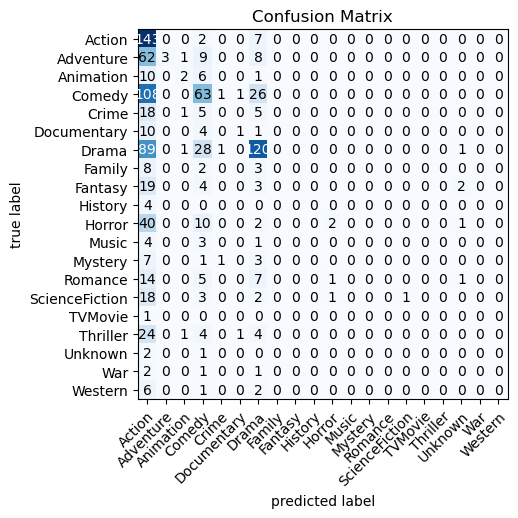

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.24      0.94      0.39       152
     Adventure       1.00      0.04      0.07        83
     Animation       0.33      0.11      0.16        19
        Comedy       0.41      0.32      0.36       199
         Crime       0.00      0.00      0.00        29
   Documentary       0.33      0.06      0.11        16
         Drama       0.61      0.50      0.55       240
        Family       0.00      0.00      0.00        13
       Fantasy       0.00      0.00      0.00        28
       History       0.00      0.00      0.00         4
        Horror       0.50      0.04      0.07        55
         Music       0.00      0.00      0.00         8
       Mystery       0.00      0.00      0.00        12
       Romance       0.00      0.00      0.00        28
ScienceFiction       1.00      0.04      0.08        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

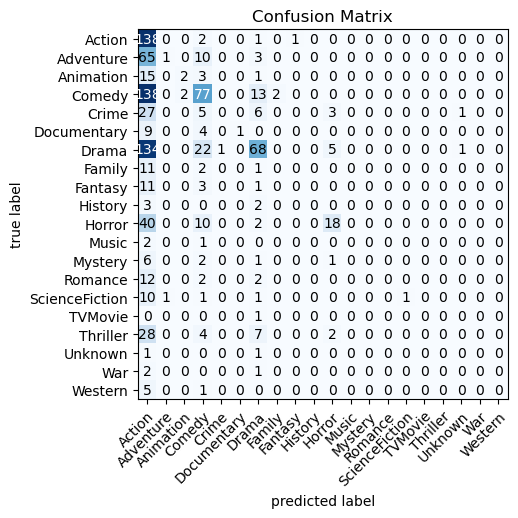

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.21      0.97      0.35       142
     Adventure       0.50      0.01      0.02        79
     Animation       0.50      0.10      0.16        21
        Comedy       0.52      0.33      0.40       232
         Crime       0.00      0.00      0.00        42
   Documentary       1.00      0.07      0.13        14
         Drama       0.61      0.29      0.40       231
        Family       0.00      0.00      0.00        14
       Fantasy       0.00      0.00      0.00        15
       History       0.00      0.00      0.00         5
        Horror       0.62      0.26      0.36        70
         Music       0.00      0.00      0.00         3
       Mystery       0.00      0.00      0.00        10
       Romance       0.00      0.00      0.00        16
ScienceFiction       1.00      0.07      0.13        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

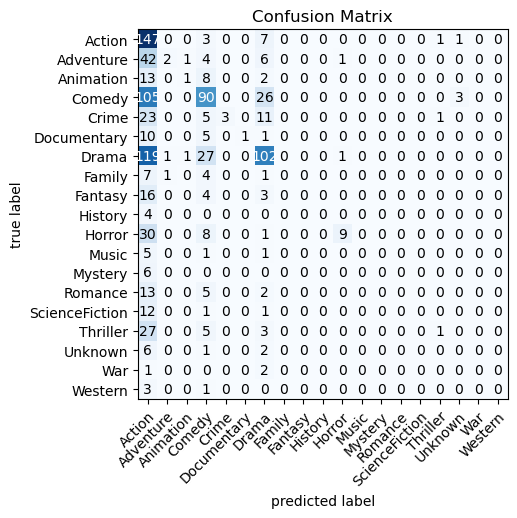

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.25      0.92      0.39       159
     Adventure       0.50      0.04      0.07        56
     Animation       0.33      0.04      0.07        24
        Comedy       0.52      0.40      0.45       224
         Crime       1.00      0.07      0.13        43
   Documentary       1.00      0.06      0.11        17
         Drama       0.60      0.41      0.48       251
        Family       0.00      0.00      0.00        13
       Fantasy       0.00      0.00      0.00        23
       History       0.00      0.00      0.00         4
        Horror       0.82      0.19      0.31        48
         Music       0.00      0.00      0.00         7
       Mystery       0.00      0.00      0.00         6
       Romance       0.00      0.00      0.00        20
ScienceFiction       0.00      0.00      0.00        14
      Thriller       0.33      0.03      0.05        36
       Unknown       0.

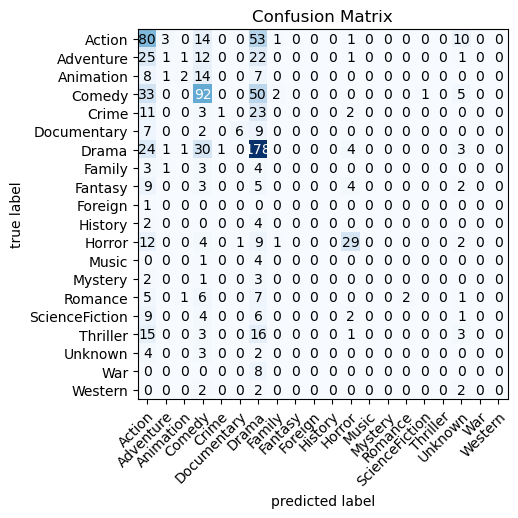

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.32      0.49      0.39       162
     Adventure       0.14      0.02      0.03        63
     Animation       0.40      0.06      0.11        32
        Comedy       0.47      0.50      0.48       183
         Crime       0.50      0.03      0.05        40
   Documentary       0.86      0.25      0.39        24
         Drama       0.43      0.74      0.54       242
        Family       0.00      0.00      0.00        11
       Fantasy       0.00      0.00      0.00        23
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.66      0.50      0.57        58
         Music       0.00      0.00      0.00         5
       Mystery       0.00      0.00      0.00         6
       Romance       1.00      0.09      0.17        22
ScienceFiction       0.00      0.00      0.00        22
      Thriller       0.

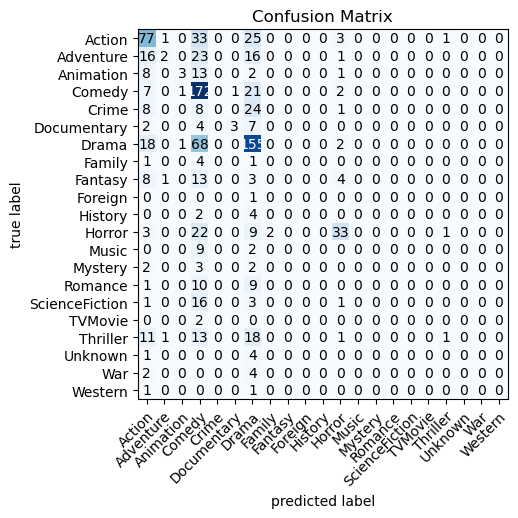

Classification Report:
                 precision    recall  f1-score   support

        Action       0.46      0.55      0.50       140
     Adventure       0.40      0.03      0.06        58
     Animation       0.60      0.11      0.19        27
        Comedy       0.41      0.84      0.56       204
         Crime       0.00      0.00      0.00        41
   Documentary       0.75      0.19      0.30        16
         Drama       0.50      0.64      0.56       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.00      0.00      0.00        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.67      0.47      0.55        70
         Music       0.00      0.00      0.00        11
       Mystery       0.00      0.00      0.00         7
       Romance       0.00      0.00      0.00        20
ScienceFiction       0.00      0.00      0.00        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold} ---")

    # a. Split into train/test for current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # b. Train Decision Tree Model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    # c. Predict
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # d. Accuracy
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {acc_train:.2f}")
    print(f"Test Accuracy: {acc_test:.2f}")
    accuracies.append(acc_test)

    # e. Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))  # Modify this line
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=np.unique(y_test))  # Adjust for unique y_test classes
    plt.title("Confusion Matrix")
    plt.show()

    # f. Classification Report: Precision, Recall, F1-Score
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    fold += 1

# 6. Report Average Accuracy
print(f"\n✅ Average Test Accuracy across all folds: {np.mean(accuracies):.2f}")


--- Fold 1 ---
Train Accuracy: 1.00
Test Accuracy: 0.65


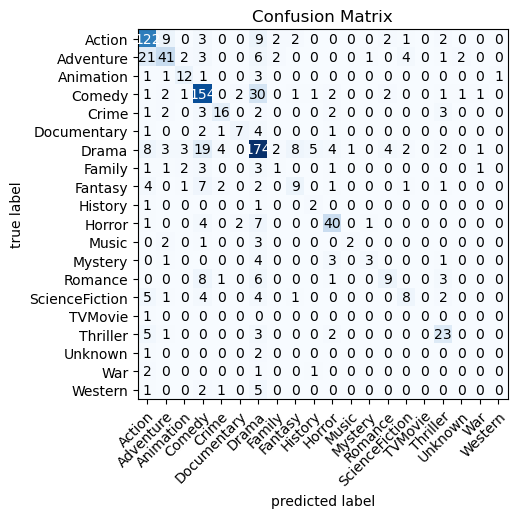

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.69      0.80      0.74       152
     Adventure       0.64      0.49      0.56        83
     Animation       0.57      0.63      0.60        19
        Comedy       0.72      0.77      0.75       199
         Crime       0.64      0.55      0.59        29
   Documentary       0.64      0.44      0.52        16
         Drama       0.65      0.72      0.68       240
        Family       0.14      0.08      0.10        13
       Fantasy       0.43      0.32      0.37        28
       History       0.22      0.50      0.31         4
        Horror       0.70      0.73      0.71        55
         Music       0.67      0.25      0.36         8
       Mystery       0.60      0.25      0.35        12
       Romance       0.53      0.32      0.40        28
ScienceFiction       0.50      0.32      0.39        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

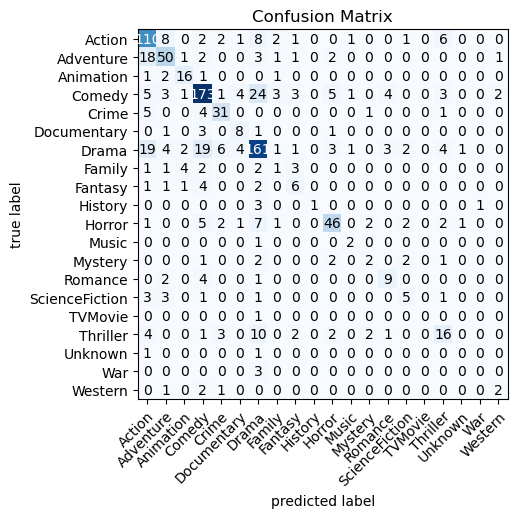

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.65      0.77      0.71       142
     Adventure       0.66      0.63      0.65        79
     Animation       0.64      0.76      0.70        21
        Comedy       0.77      0.75      0.76       232
         Crime       0.67      0.74      0.70        42
   Documentary       0.44      0.57      0.50        14
         Drama       0.70      0.70      0.70       231
        Family       0.10      0.07      0.08        14
       Fantasy       0.35      0.40      0.38        15
       History       1.00      0.20      0.33         5
        Horror       0.75      0.66      0.70        70
         Music       0.40      0.67      0.50         3
       Mystery       0.29      0.20      0.24        10
       Romance       0.53      0.56      0.55        16
ScienceFiction       0.42      0.36      0.38        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

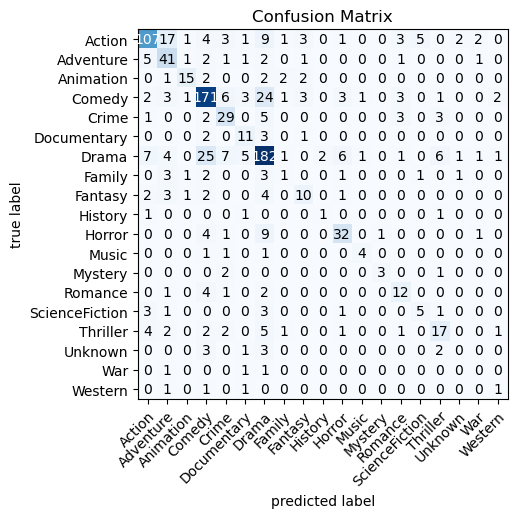

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.81      0.67      0.74       159
     Adventure       0.53      0.73      0.61        56
     Animation       0.75      0.62      0.68        24
        Comedy       0.75      0.76      0.76       224
         Crime       0.55      0.67      0.60        43
   Documentary       0.44      0.65      0.52        17
         Drama       0.71      0.73      0.72       251
        Family       0.14      0.08      0.10        13
       Fantasy       0.50      0.43      0.47        23
       History       0.33      0.25      0.29         4
        Horror       0.70      0.67      0.68        48
         Music       0.67      0.57      0.62         7
       Mystery       0.75      0.50      0.60         6
       Romance       0.50      0.60      0.55        20
ScienceFiction       0.45      0.36      0.40        14
       TVMovie       0.00      0.00      0.00         0
      Thriller       0.

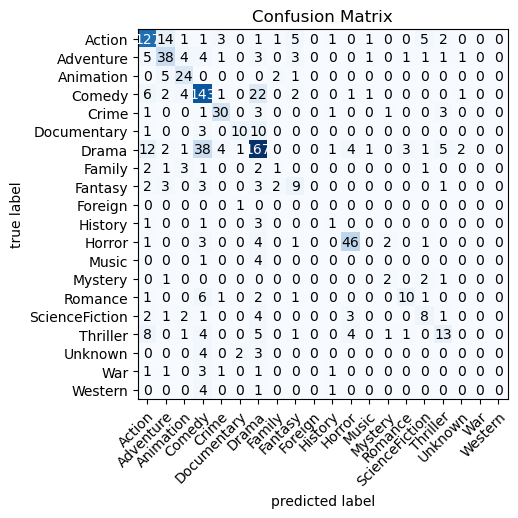

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.75      0.78      0.77       162
     Adventure       0.56      0.60      0.58        63
     Animation       0.60      0.75      0.67        32
        Comedy       0.65      0.78      0.71       183
         Crime       0.73      0.75      0.74        40
   Documentary       0.71      0.42      0.53        24
         Drama       0.70      0.69      0.70       242
        Family       0.17      0.09      0.12        11
       Fantasy       0.39      0.39      0.39        23
       Foreign       0.00      0.00      0.00         1
       History       0.17      0.17      0.17         6
        Horror       0.79      0.79      0.79        58
         Music       0.00      0.00      0.00         5
       Mystery       0.33      0.33      0.33         6
       Romance       0.67      0.45      0.54        22
ScienceFiction       0.40      0.36      0.38        22
      Thriller       0.

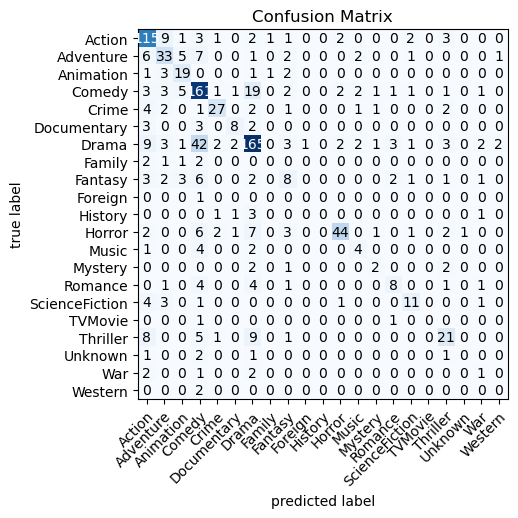

Classification Report:
                 precision    recall  f1-score   support

        Action       0.70      0.82      0.76       140
     Adventure       0.55      0.57      0.56        58
     Animation       0.54      0.70      0.61        27
        Comedy       0.64      0.79      0.71       204
         Crime       0.77      0.66      0.71        41
   Documentary       0.62      0.50      0.55        16
         Drama       0.74      0.68      0.71       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.32      0.28      0.30        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.86      0.63      0.73        70
         Music       0.36      0.36      0.36        11
       Mystery       0.33      0.29      0.31         7
       Romance       0.53      0.40      0.46        20
ScienceFiction       0.61      0.52      0.56        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"\n--- Fold {fold} ---")

    # a. Split into train/test for current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # b. Train Decision Tree Model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # c. Predict
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # d. Accuracy
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {acc_train:.2f}")
    print(f"Test Accuracy: {acc_test:.2f}")
    accuracies.append(acc_test)

    # e. Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))  # Modify this line
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=np.unique(y_test))  # Adjust for unique y_test classes
    plt.title("Confusion Matrix")
    plt.show()

    # f. Classification Report: Precision, Recall, F1-Score
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    fold += 1

# 6. Report Average Accuracy
print(f"\n✅ Average Test Accuracy across all folds: {np.mean(accuracies):.2f}")

# aglomerative 

=== KMeans Clustering ===
Inertia: 24015763.46671095
Silhouette Score: 0.0832292156538742


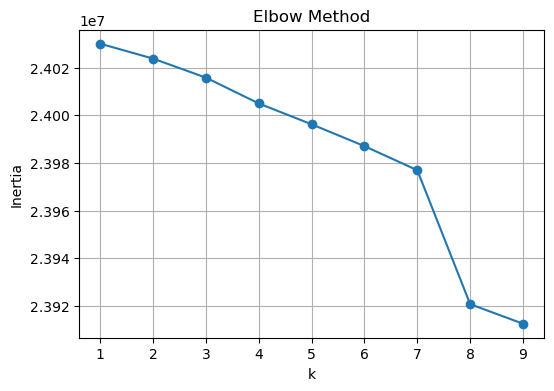

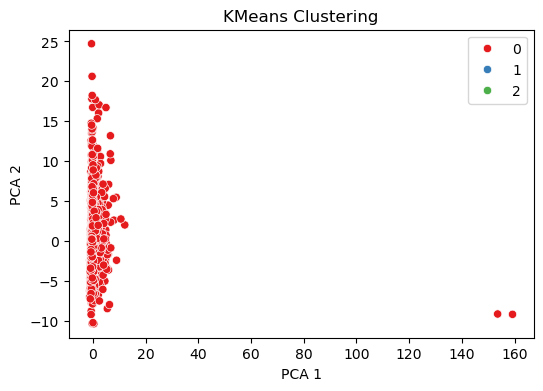

In [67]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

print("=== KMeans Clustering ===")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels)}")

# Elbow Method
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# KMeans Cluster plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1')
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



=== Agglomerative Clustering (ward) ===
Silhouette Score: 0.2020


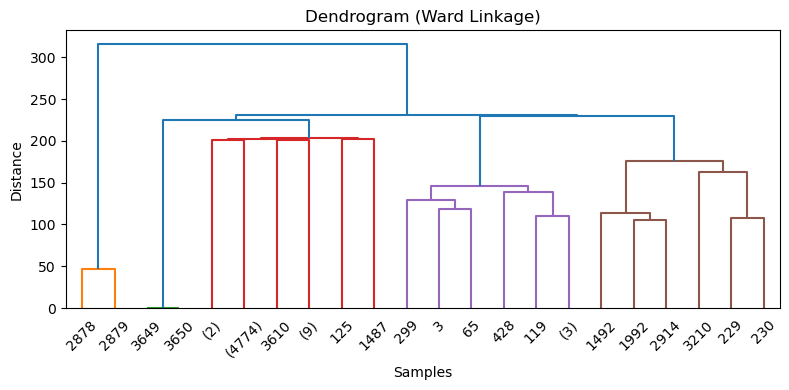

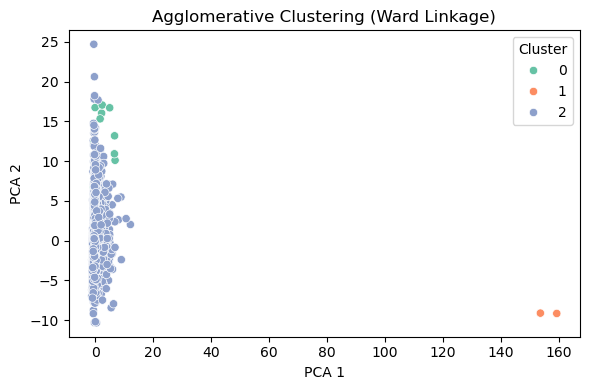


=== Agglomerative Clustering (complete) ===
Silhouette Score: 0.3923


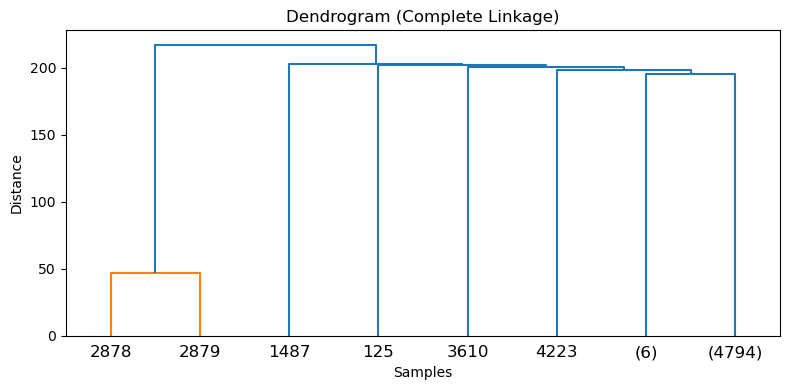

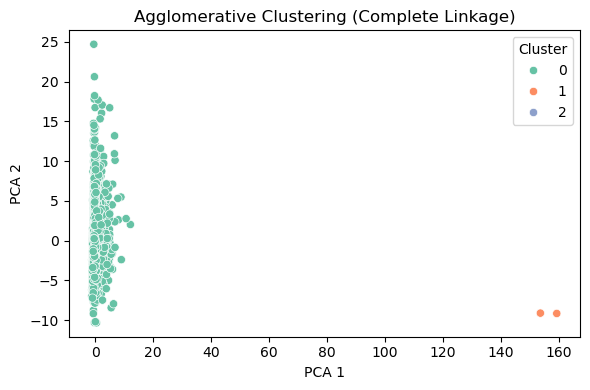


=== Agglomerative Clustering (average) ===
Silhouette Score: 0.3923


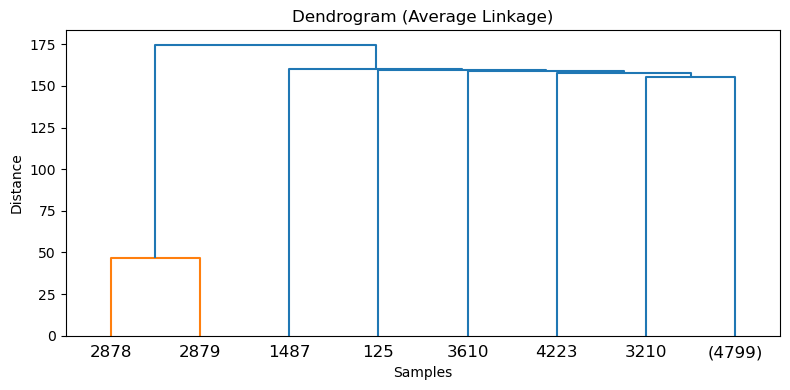

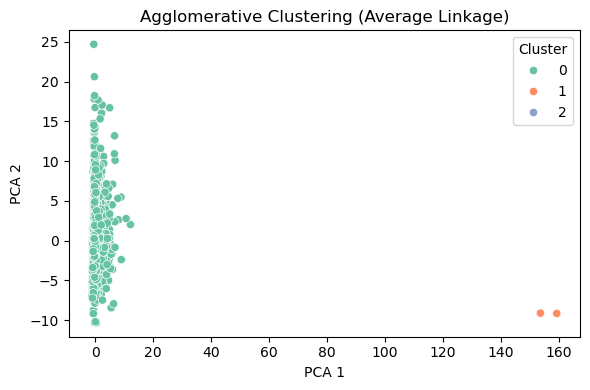


=== Agglomerative Clustering (single) ===
Silhouette Score: 0.3923


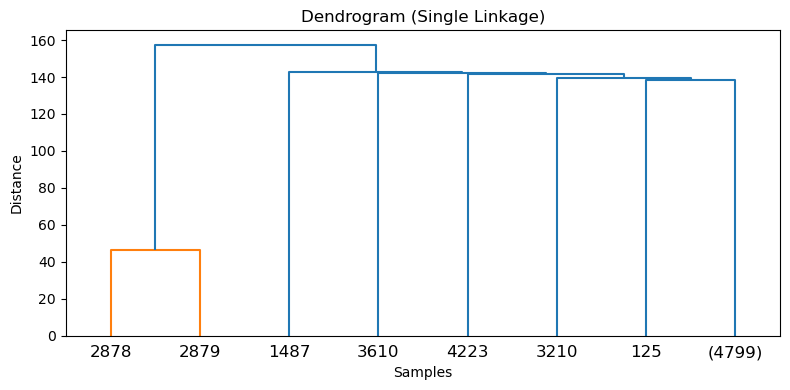

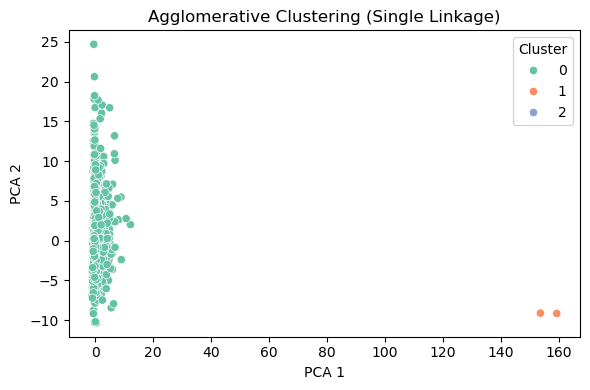


=== Summary of Silhouette Scores ===
Ward: 0.2020
Complete: 0.3923
Average: 0.3923
Single: 0.3923

🔍 Best Linkage Method: Complete with score 0.3923


In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = {}

for method in linkage_methods:
    print(f"\n=== Agglomerative Clustering ({method}) ===")
    
    # Compute linkage matrix for dendrogram
    linked = linkage(X_scaled, method=method)
    
    # Agglomerative Clustering model
    if method == 'ward':
        model = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        model = AgglomerativeClustering(n_clusters=3, linkage=method, metric='euclidean')
    
    # Fit and predict
    labels = model.fit_predict(X_scaled)

    # Save silhouette score
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[method] = score
    print(f"Silhouette Score: {score:.4f}")
    
    # Dendrogram
    plt.figure(figsize=(8, 4))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    
    # Cluster Scatter Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
    plt.title(f'Agglomerative Clustering ({method.capitalize()} Linkage)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Show best method
best_method = max(silhouette_scores, key=silhouette_scores.get)
print("\n=== Summary of Silhouette Scores ===")
for method, score in silhouette_scores.items():
    print(f"{method.capitalize()}: {score:.4f}")
print(f"\n🔍 Best Linkage Method: {best_method.capitalize()} with score {silhouette_scores[best_method]:.4f}")


# ANN


🔍 Running model: SVM (Linear)

--- Fold 1 ---
Train Accuracy: 1.00
Test Accuracy: 0.65


C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


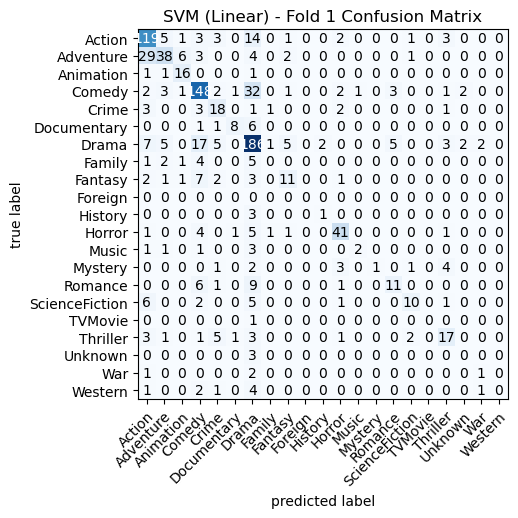

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.67      0.78      0.72       152
     Adventure       0.67      0.46      0.54        83
     Animation       0.62      0.84      0.71        19
        Comedy       0.73      0.74      0.74       199
         Crime       0.46      0.62      0.53        29
   Documentary       0.73      0.50      0.59        16
         Drama       0.64      0.78      0.70       240
        Family       0.00      0.00      0.00        13
       Fantasy       0.52      0.39      0.45        28
       History       0.33      0.25      0.29         4
        Horror       0.76      0.75      0.75        55
         Music       0.67      0.25      0.36         8
       Mystery       1.00      0.08      0.15        12
       Romance       0.58      0.39      0.47        28
ScienceFiction       0.67      0.40      0.50        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


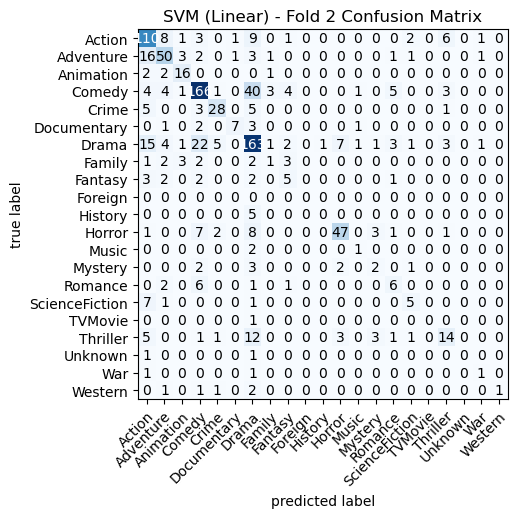

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.64      0.77      0.70       142
     Adventure       0.65      0.63      0.64        79
     Animation       0.64      0.76      0.70        21
        Comedy       0.76      0.72      0.74       232
         Crime       0.74      0.67      0.70        42
   Documentary       0.78      0.50      0.61        14
         Drama       0.62      0.71      0.66       231
        Family       0.14      0.07      0.10        14
       Fantasy       0.31      0.33      0.32        15
       History       0.00      0.00      0.00         5
        Horror       0.80      0.67      0.73        70
         Music       0.25      0.33      0.29         3
       Mystery       0.22      0.20      0.21        10
       Romance       0.33      0.38      0.35        16
ScienceFiction       0.45      0.36      0.40        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


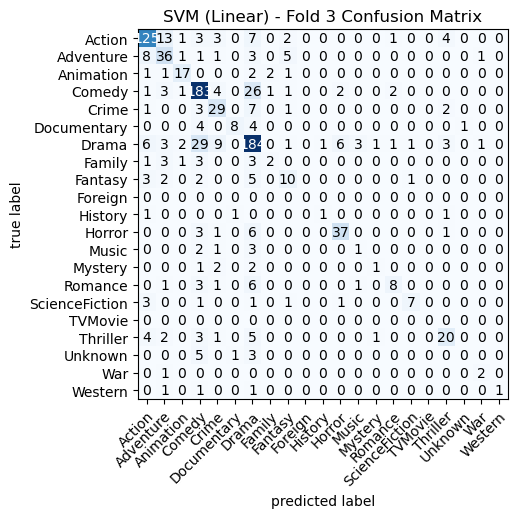

Classification Report:
                 precision    recall  f1-score   support

        Action       0.81      0.79      0.80       159
     Adventure       0.55      0.64      0.59        56
     Animation       0.74      0.71      0.72        24
        Comedy       0.74      0.82      0.78       224
         Crime       0.56      0.67      0.61        43
   Documentary       0.80      0.47      0.59        17
         Drama       0.69      0.73      0.71       251
        Family       0.40      0.15      0.22        13
       Fantasy       0.45      0.43      0.44        23
       History       0.50      0.25      0.33         4
        Horror       0.80      0.77      0.79        48
         Music       0.20      0.14      0.17         7
       Mystery       0.33      0.17      0.22         6
       Romance       0.67      0.40      0.50        20
ScienceFiction       0.78      0.50      0.61        14
      Thriller       0.65      0.56      0.60        36
       Unknown       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


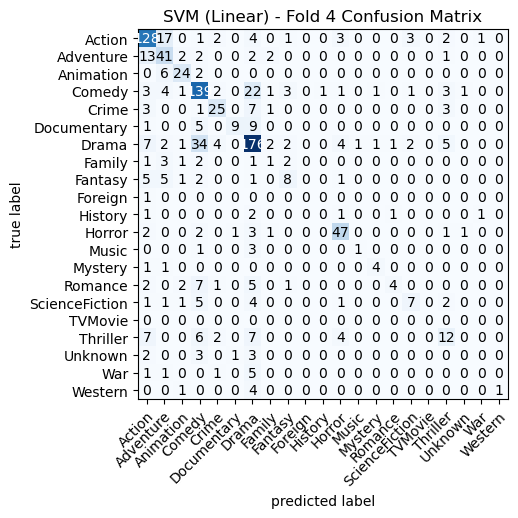

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.72      0.79      0.75       162
     Adventure       0.51      0.65      0.57        63
     Animation       0.71      0.75      0.73        32
        Comedy       0.66      0.76      0.70       183
         Crime       0.68      0.62      0.65        40
   Documentary       0.82      0.38      0.51        24
         Drama       0.68      0.73      0.70       242
        Family       0.12      0.09      0.11        11
       Fantasy       0.47      0.35      0.40        23
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.76      0.81      0.78        58
         Music       0.50      0.20      0.29         5
       Mystery       0.67      0.67      0.67         6
       Romance       0.67      0.18      0.29        22
ScienceFiction       0.54      0.32      0.40        22
      Thriller       0.

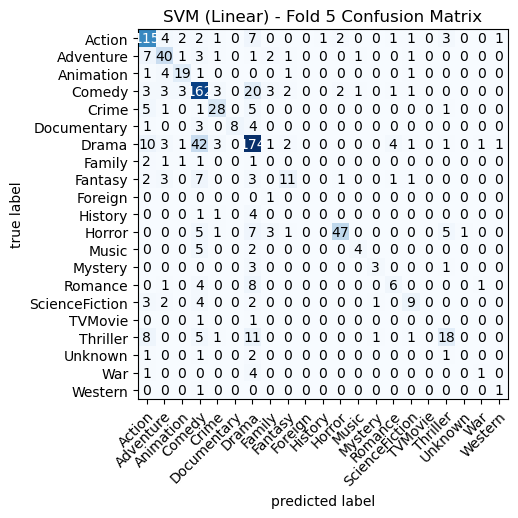

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.72      0.82      0.77       140
     Adventure       0.65      0.69      0.67        58
     Animation       0.70      0.70      0.70        27
        Comedy       0.65      0.79      0.72       204
         Crime       0.72      0.68      0.70        41
   Documentary       1.00      0.50      0.67        16
         Drama       0.67      0.71      0.69       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.61      0.38      0.47        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.90      0.67      0.77        70
         Music       0.67      0.36      0.47        11
       Mystery       0.60      0.43      0.50         7
       Romance       0.46      0.30      0.36        20
ScienceFiction       0.56      0.43      0.49        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


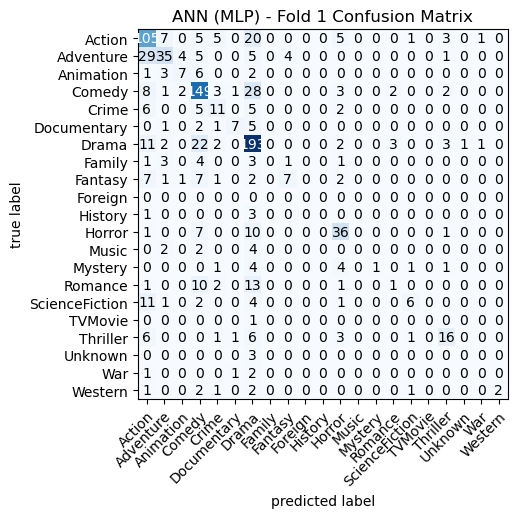

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.55      0.69      0.61       152
     Adventure       0.62      0.42      0.50        83
     Animation       0.50      0.37      0.42        19
        Comedy       0.65      0.75      0.70       199
         Crime       0.39      0.38      0.39        29
   Documentary       0.70      0.44      0.54        16
         Drama       0.61      0.80      0.70       240
        Family       0.00      0.00      0.00        13
       Fantasy       0.58      0.25      0.35        28
       History       0.00      0.00      0.00         4
        Horror       0.60      0.65      0.63        55
         Music       0.00      0.00      0.00         8
       Mystery       1.00      0.08      0.15        12
       Romance       0.17      0.04      0.06        28
ScienceFiction       0.60      0.24      0.34        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


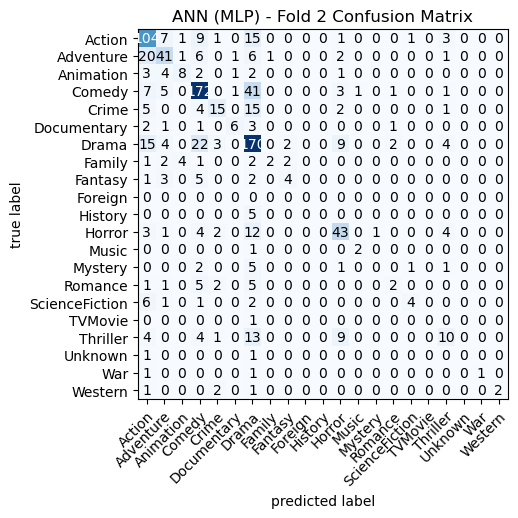

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.59      0.73      0.66       142
     Adventure       0.59      0.52      0.55        79
     Animation       0.57      0.38      0.46        21
        Comedy       0.72      0.74      0.73       232
         Crime       0.58      0.36      0.44        42
   Documentary       0.67      0.43      0.52        14
         Drama       0.56      0.74      0.64       231
        Family       0.67      0.14      0.24        14
       Fantasy       0.50      0.27      0.35        15
       History       0.00      0.00      0.00         5
        Horror       0.61      0.61      0.61        70
         Music       0.67      0.67      0.67         3
       Mystery       0.00      0.00      0.00        10
       Romance       0.33      0.12      0.18        16
ScienceFiction       0.67      0.29      0.40        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


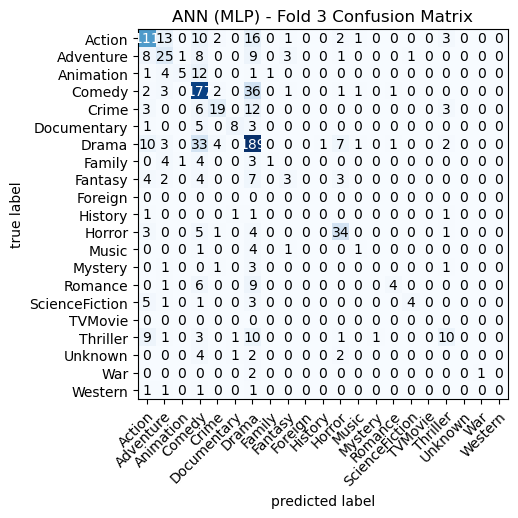

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.70      0.70      0.70       159
     Adventure       0.42      0.45      0.43        56
     Animation       0.71      0.21      0.32        24
        Comedy       0.63      0.79      0.70       224
         Crime       0.66      0.44      0.53        43
   Documentary       0.73      0.47      0.57        17
         Drama       0.60      0.75      0.67       251
        Family       0.50      0.08      0.13        13
       Fantasy       0.33      0.13      0.19        23
       History       0.00      0.00      0.00         4
        Horror       0.67      0.71      0.69        48
         Music       0.25      0.14      0.18         7
       Mystery       0.00      0.00      0.00         6
       Romance       0.67      0.20      0.31        20
ScienceFiction       0.80      0.29      0.42        14
      Thriller       0.48      0.28      0.35        36
       Unknown       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


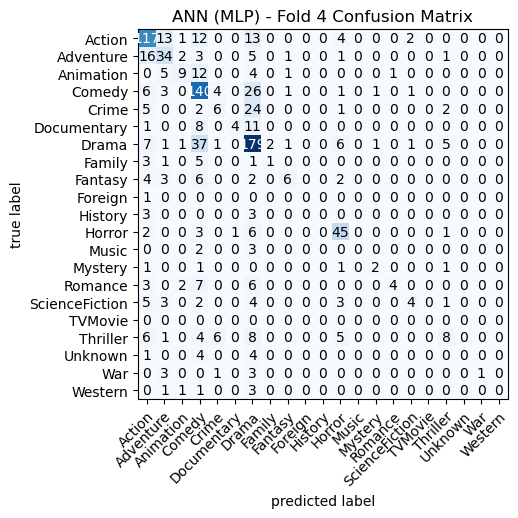

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.65      0.72      0.68       162
     Adventure       0.50      0.54      0.52        63
     Animation       0.56      0.28      0.38        32
        Comedy       0.56      0.77      0.65       183
         Crime       0.33      0.15      0.21        40
   Documentary       0.80      0.17      0.28        24
         Drama       0.59      0.74      0.65       242
        Family       0.33      0.09      0.14        11
       Fantasy       0.60      0.26      0.36        23
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.65      0.78      0.71        58
         Music       0.00      0.00      0.00         5
       Mystery       0.50      0.33      0.40         6
       Romance       0.80      0.18      0.30        22
ScienceFiction       0.50      0.18      0.27        22
      Thriller       0.

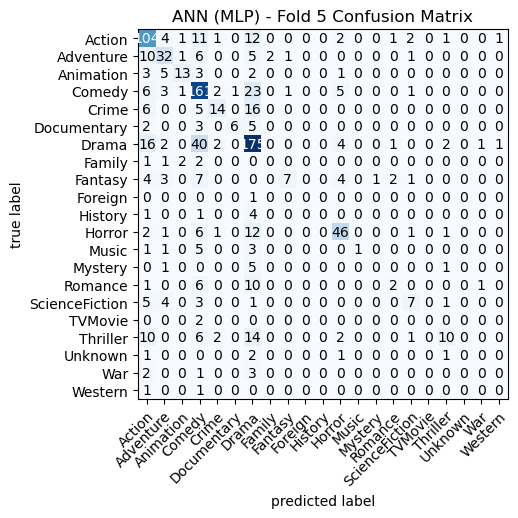

Classification Report:
                 precision    recall  f1-score   support

        Action       0.59      0.74      0.66       140
     Adventure       0.56      0.55      0.56        58
     Animation       0.72      0.48      0.58        27
        Comedy       0.60      0.79      0.68       204
         Crime       0.64      0.34      0.44        41
   Documentary       0.86      0.38      0.52        16
         Drama       0.60      0.72      0.65       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.78      0.24      0.37        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.71      0.66      0.68        70
         Music       1.00      0.09      0.17        11
       Mystery       0.00      0.00      0.00         7
       Romance       0.33      0.10      0.15        20
ScienceFiction       0.50      0.33      0.40        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Models to compare
models = {
    "ANN (MLP)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over models
for model_name, model in models.items():
    print(f"\n========================")
    print(f"🔍 Running model: {model_name}")
    print(f"========================")

    fold = 1
    accuracies = []

    for train_index, test_index in kf.split(X):
        print(f"\n--- Fold {fold} ---")

        # a. Split into train/test for current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # b. Train Model
        model.fit(X_train, y_train)

        # c. Predict
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # d. Accuracy
        acc_test = accuracy_score(y_test, y_test_pred)
        acc_train = accuracy_score(y_train, y_train_pred)
        print(f"Train Accuracy: {acc_train:.2f}")
        print(f"Test Accuracy: {acc_test:.2f}")
        accuracies.append(acc_test)

        # e. Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
        fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=np.unique(y))
        plt.title(f"{model_name} - Fold {fold} Confusion Matrix")
        plt.show()

        # f. Classification Report
        print("Classification Report:\n", classification_report(y_test, y_test_pred))

        fold += 1

    # 6. Report Average Accuracy
    print(f"\n✅ Average Test Accuracy for {model_name}: {np.mean(accuracies):.2f}")


# SVM (Linear)


🔍 Running model: SVM (Linear)

--- Fold 1 ---
Train Accuracy: 1.00
Test Accuracy: 0.65


C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


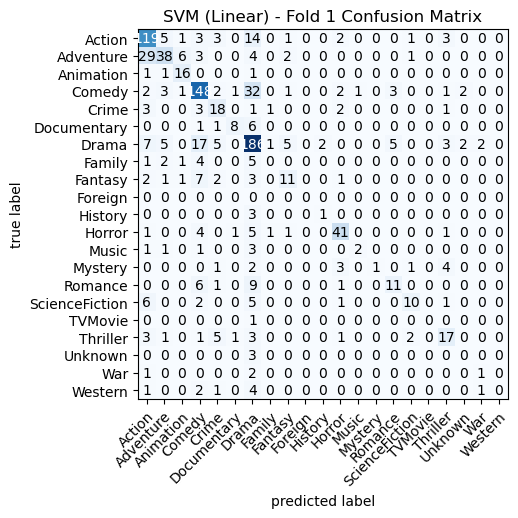

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.67      0.78      0.72       152
     Adventure       0.67      0.46      0.54        83
     Animation       0.62      0.84      0.71        19
        Comedy       0.73      0.74      0.74       199
         Crime       0.46      0.62      0.53        29
   Documentary       0.73      0.50      0.59        16
         Drama       0.64      0.78      0.70       240
        Family       0.00      0.00      0.00        13
       Fantasy       0.52      0.39      0.45        28
       History       0.33      0.25      0.29         4
        Horror       0.76      0.75      0.75        55
         Music       0.67      0.25      0.36         8
       Mystery       1.00      0.08      0.15        12
       Romance       0.58      0.39      0.47        28
ScienceFiction       0.67      0.40      0.50        25
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


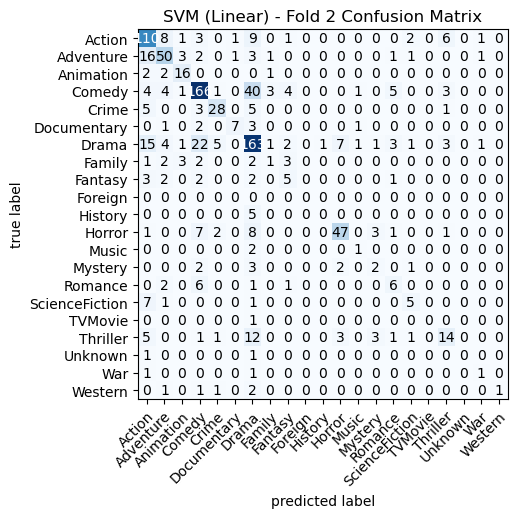

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.64      0.77      0.70       142
     Adventure       0.65      0.63      0.64        79
     Animation       0.64      0.76      0.70        21
        Comedy       0.76      0.72      0.74       232
         Crime       0.74      0.67      0.70        42
   Documentary       0.78      0.50      0.61        14
         Drama       0.62      0.71      0.66       231
        Family       0.14      0.07      0.10        14
       Fantasy       0.31      0.33      0.32        15
       History       0.00      0.00      0.00         5
        Horror       0.80      0.67      0.73        70
         Music       0.25      0.33      0.29         3
       Mystery       0.22      0.20      0.21        10
       Romance       0.33      0.38      0.35        16
ScienceFiction       0.45      0.36      0.40        14
       TVMovie       0.00      0.00      0.00         1
      Thriller       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


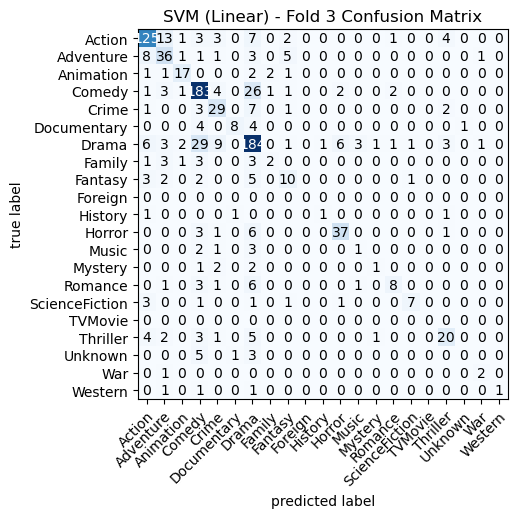

Classification Report:
                 precision    recall  f1-score   support

        Action       0.81      0.79      0.80       159
     Adventure       0.55      0.64      0.59        56
     Animation       0.74      0.71      0.72        24
        Comedy       0.74      0.82      0.78       224
         Crime       0.56      0.67      0.61        43
   Documentary       0.80      0.47      0.59        17
         Drama       0.69      0.73      0.71       251
        Family       0.40      0.15      0.22        13
       Fantasy       0.45      0.43      0.44        23
       History       0.50      0.25      0.33         4
        Horror       0.80      0.77      0.79        48
         Music       0.20      0.14      0.17         7
       Mystery       0.33      0.17      0.22         6
       Romance       0.67      0.40      0.50        20
ScienceFiction       0.78      0.50      0.61        14
      Thriller       0.65      0.56      0.60        36
       Unknown       0.

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


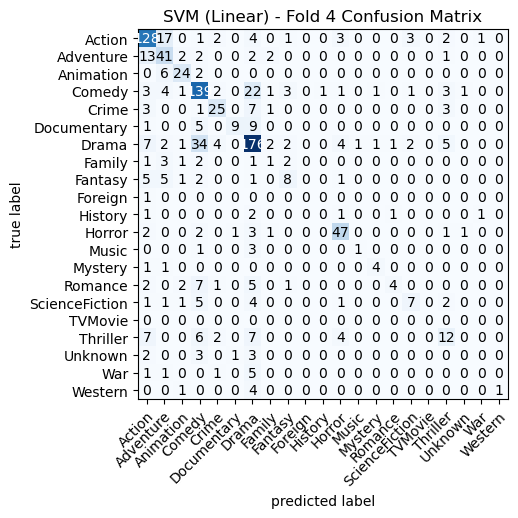

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                 precision    recall  f1-score   support

        Action       0.72      0.79      0.75       162
     Adventure       0.51      0.65      0.57        63
     Animation       0.71      0.75      0.73        32
        Comedy       0.66      0.76      0.70       183
         Crime       0.68      0.62      0.65        40
   Documentary       0.82      0.38      0.51        24
         Drama       0.68      0.73      0.70       242
        Family       0.12      0.09      0.11        11
       Fantasy       0.47      0.35      0.40        23
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.76      0.81      0.78        58
         Music       0.50      0.20      0.29         5
       Mystery       0.67      0.67      0.67         6
       Romance       0.67      0.18      0.29        22
ScienceFiction       0.54      0.32      0.40        22
      Thriller       0.

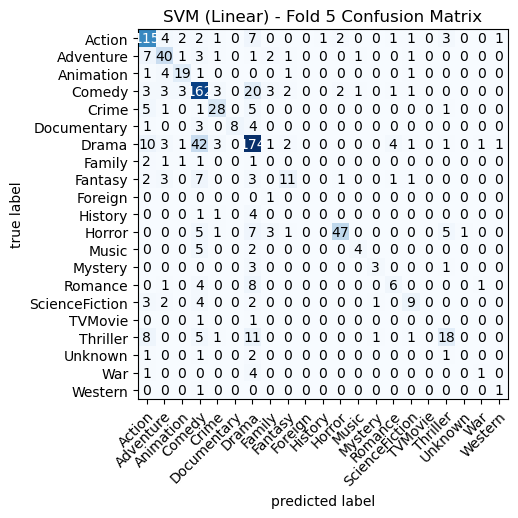

Classification Report:
                 precision    recall  f1-score   support

        Action       0.72      0.82      0.77       140
     Adventure       0.65      0.69      0.67        58
     Animation       0.70      0.70      0.70        27
        Comedy       0.65      0.79      0.72       204
         Crime       0.72      0.68      0.70        41
   Documentary       1.00      0.50      0.67        16
         Drama       0.67      0.71      0.69       244
        Family       0.00      0.00      0.00         6
       Fantasy       0.61      0.38      0.47        29
       Foreign       0.00      0.00      0.00         1
       History       0.00      0.00      0.00         6
        Horror       0.90      0.67      0.77        70
         Music       0.67      0.36      0.47        11
       Mystery       0.60      0.43      0.50         7
       Romance       0.46      0.30      0.36        20
ScienceFiction       0.56      0.43      0.49        21
       TVMovie       0.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Models to compare 
model_SVM = {
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over models
for model_name, model in model_SVM.items():
    print(f"\n========================")
    print(f"🔍 Running model: {model_name}")
    print(f"========================")

    fold = 1
    accuracies = []

    for train_index, test_index in kf.split(X):
        print(f"\n--- Fold {fold} ---")

        # a. Split into train/test for current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # b. Train Model
        model.fit(X_train, y_train)

        # c. Predict
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # d. Accuracy
        acc_test = accuracy_score(y_test, y_test_pred)
        acc_train = accuracy_score(y_train, y_train_pred)
        print(f"Train Accuracy: {acc_train:.2f}")
        print(f"Test Accuracy: {acc_test:.2f}")
        accuracies.append(acc_test)

        # e. Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
        fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=np.unique(y))
        plt.title(f"{model_name} - Fold {fold} Confusion Matrix")
        plt.show()

        # f. Classification Report
        print("Classification Report:\n", classification_report(y_test, y_test_pred))

        fold += 1

    # 6. Report Average Accuracy
    print(f"\n✅ Average Test Accuracy for {model_name}: {np.mean(accuracies):.2f}")


# exporting data

In [98]:
pickle.dump(new_df.to_dict(), open('movies_dict.pkl', 'wb'))
# pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [107]:
# Retrain on full data
final_svm_model = SVC(kernel='linear', probability=True, random_state=42)
final_svm_model.fit(X, y)

# Save model
import pickle
with open("svm_model.pkl", "wb") as f:
    pickle.dump(final_svm_model, f)

# Save vectorizer (if using TF-IDF or CountVectorizer)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)  # replace with your actual vectorizer

# Save label encoder if used
with open("genre_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


NameError: name 'vectorizer' is not defined